In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np



In [14]:
# Parameter simulation
population_size=300000
sample_size=50
number_of_samples=1000


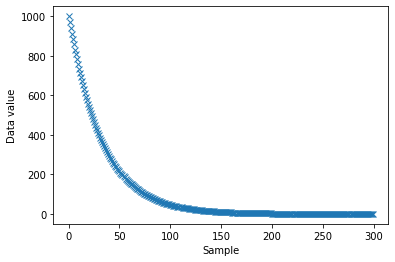

In [13]:
#Generating population of numbers using 1/f distribution
population=1/np.logspace(np.log10(0.001), np.log10(10), population_size)
actual_mean=np.mean(population)
skip=1000 #skipping every 1000 datapoints for feasbile plotting
plt.plot(population[::skip], 'x')
plt.xlabel('Sample')
plt.ylabel('Data value')
plt.show() 


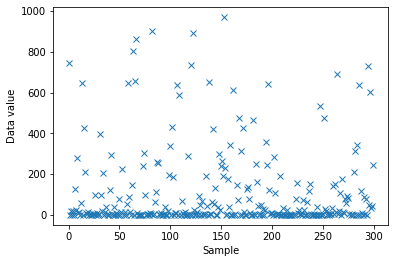

In [11]:
#shuffling the dataset
np.random.shuffle(population)  
plt.plot(population[::skip], 'x')
plt.xlabel('Sample')
plt.ylabel('Data value')
plt.show() 

In [39]:
#Monte carlo sampling
samplemeans=np.zeros(number_of_samples)
for i in range(number_of_samples):
  randsample=np.random.choice(population, size=sample_size)
  samplemeans[i]=np.mean(randsample)

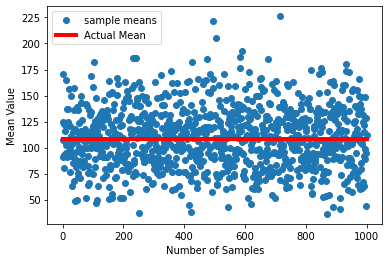

In [43]:
#Actual mean vs random sample mean
plt.plot(samplemeans, 'o', label='sample means')
plt.plot([0,number_of_samples] , [actual_mean, actual_mean], 'r', linewidth=4, label='Actual Mean')
plt.legend()
plt.xlabel('Number of Samples')
plt.ylabel('Mean Value')
plt.show()

In [ ]:
#Indivual Sample means are not reliable since variance is too high
#By LLN, averaging the sample means together will give a closer value to the actual mean.
#The more of the samples we average together, the closer to the actual mean we are going to reach. 



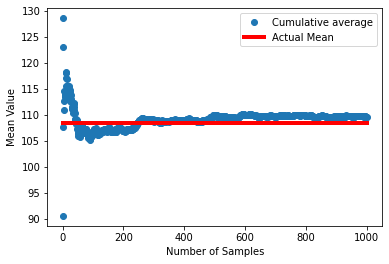

In [44]:
#Computing and plotting cumulative average
cavg=np.zeros(number_of_samples)
for i in range(number_of_samples):
  cavg[i]=np.mean(samplemeans[:i+1])
plt.plot(cavg, 'o', label='Cumulative average')
plt.plot([0,number_of_samples] , [actual_mean, actual_mean], 'r', linewidth=4, label='Actual Mean')
plt.legend()
plt.xlabel('Number of Samples')
plt.ylabel('Mean Value')
plt.show()


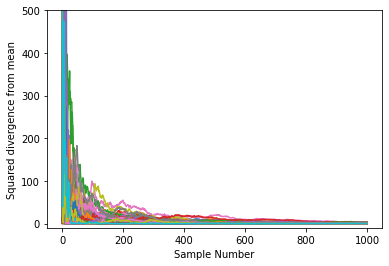

In [60]:
#Computing divergence between Cumulative average and Actual mean
number_of_samples2=100
allsamplemeans=np.zeros((number_of_samples2, number_of_samples))
divg=np.zeros((number_of_samples2, number_of_samples))

for j in range(number_of_samples2):
  for i in range(number_of_samples):
    randsample=np.random.choice(population, size=sample_size)
    samplemeans[i]=np.mean(randsample)

  tmp=np.cumsum(samplemeans)/np.arange(1, number_of_samples +1)
  divg[j, :] =(tmp-actual_mean)**2
  #store sample means
  allsamplemeans[j,:]=samplemeans


#Plotting Divergence
plt.plot(divg.T)
plt.ylim([-10, 500])
plt.ylabel('Squared divergence from mean')
plt.xlabel('Sample Number')
plt.show()
  
    
  



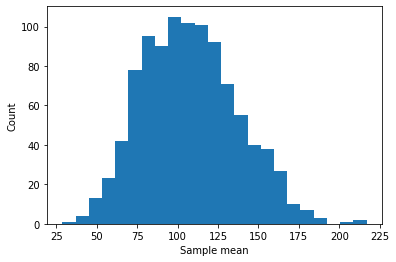

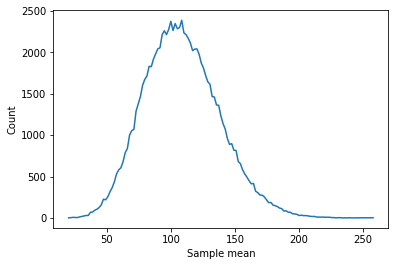

In [75]:
#Central Limit Theorem visualization
#Gaussian Distribution
plt.hist(samplemeans, bins='fd')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

y,x=np.histogram(allsamplemeans[0:], bins='fd')
x=(x[1:]+ x[:-1])/2
plt.plot(x,y)
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()